In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("Bengaluru_House_Data.csv")

In [3]:
df.sample(10)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
9415,Super built-up Area,Ready To Move,Akshaya Nagar,3 BHK,HiahsLa,2061,4.0,2.0,175.00
689,Super built-up Area,19-Dec,Hoodi,4 BHK,Caycend,2118,4.0,2.0,111.00
10940,Super built-up Area,Ready To Move,Hosakerehalli,3 BHK,Taonte,2376,3.0,1.0,240.00
595,Super built-up Area,Ready To Move,HSR Layout,3 BHK,NaN,1430,2.0,1.0,65.00
7424,Super built-up Area,21-Dec,Hoodi,2 BHK,GoAirej,1108,2.0,1.0,74.23
4261,Super built-up Area,Ready To Move,Whitefield,2 BHK,Veales,1320,2.0,3.0,79.50
917,Built-up Area,Ready To Move,Marathahalli,2 BHK,Foodasa,1170,2.0,3.0,53.00
8164,Super built-up Area,Ready To Move,Raja Rajeshwari Nagar,3 BHK,GrrvaGr,1531,3.0,3.0,51.77
8918,Super built-up Area,Ready To Move,Doddakallasandra,2 BHK,NaN,1072,2.0,1.0,42.87
11742,Super built-up Area,Ready To Move,Electronic City,3 BHK,Elodsre,1521,2.0,2.0,57.50


In [4]:
df.describe()

,bath,balcony,price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.341458,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [6]:
df.area_type.unique()

array(['Super built-up  Area', 'Plot  Area', 'Built-up  Area',
       'Carpet  Area'], dtype=object)

In [7]:
df.availability.unique()

array(['19-Dec', 'Ready To Move', '18-May', '18-Feb', '18-Nov', '20-Dec',
       '17-Oct', '21-Dec', '19-Sep', '20-Sep', '18-Mar', '20-Feb',
       '18-Apr', '20-Aug', '18-Oct', '19-Mar', '17-Sep', '18-Dec',
       '17-Aug', '19-Apr', '18-Jun', '22-Dec', '22-Jan', '18-Aug',
       '19-Jan', '17-Jul', '18-Jul', '21-Jun', '20-May', '19-Aug',
       '18-Sep', '17-May', '17-Jun', '21-May', '18-Jan', '20-Mar',
       '17-Dec', '16-Mar', '19-Jun', '22-Jun', '19-Jul', '21-Feb',
       'Immediate Possession', '19-May', '17-Nov', '20-Oct', '20-Jun',
       '19-Feb', '21-Oct', '21-Jan', '17-Mar', '17-Apr', '22-May',
       '19-Oct', '21-Jul', '21-Nov', '21-Mar', '16-Dec', '22-Mar',
       '20-Jan', '21-Sep', '21-Aug', '14-Nov', '19-Nov', '15-Nov',
       '16-Jul', '15-Jun', '17-Feb', '20-Nov', '20-Jul', '16-Sep',
       '15-Oct', '15-Dec', '16-Oct', '22-Nov', '15-Aug', '17-Jan',
       '16-Nov', '20-Apr', '16-Jan', '14-Jul'], dtype=object)

In [8]:
df.location.unique()

array(['Electronic City Phase II', 'Chikka Tirupathi', 'Uttarahalli', ...,
       '12th cross srinivas nagar banshankari 3rd stage',
       'Havanur extension', 'Abshot Layout'], dtype=object)

In [9]:
df1 = df.drop(['area_type','availability','society','balcony'],axis=1)

In [10]:
df1.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [11]:
df1.isna().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [12]:
df1.dropna(inplace=True)

In [13]:
df1.isna().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [14]:
df1.sample(5)

,location,size,total_sqft,bath,price
2266,9th Phase JP Nagar,4 BHK,5000,4.0,290.0
10715,Prithvi Layout,3 BHK,2100,3.0,125.0
8493,Hoskote,3 BHK,1695,3.0,50.0
10685,KR Puram,2 BHK,1035,2.0,40.0
12748,Rajaji Nagar,5 Bedroom,2500,4.0,650.0


In [15]:
df1['BR'] = df1['size'].apply(lambda x: int(x.split(' ')[0]))

In [16]:
df1.head()

,location,size,total_sqft,bath,price,BR
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [17]:
df1.drop('size',axis=1,inplace=True)

In [18]:
df1.head()

,location,total_sqft,bath,price,BR
0,Electronic City Phase II,1056,2.0,39.07,2
1,Chikka Tirupathi,2600,5.0,120.00,4
2,Uttarahalli,1440,2.0,62.00,3
3,Lingadheeranahalli,1521,3.0,95.00,3
4,Kothanur,1200,2.0,51.00,2


In [19]:
df1.BR.unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [20]:
df['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [21]:
def conv(x):
    t = x.split('-')
    if len(t) == 2:
         return (float(t[0])+float(t[1]))//2
    try:
         return float(x)
    except :
            return None
       
  
    

In [22]:
df1['sqft'] = df1['total_sqft'].apply(conv)

In [23]:
df1.drop('total_sqft',axis=1,inplace=True)

In [24]:
df1.head()

,location,bath,price,BR,sqft
0,Electronic City Phase II,2.0,39.07,2,1056.0
1,Chikka Tirupathi,5.0,120.00,4,2600.0
2,Uttarahalli,2.0,62.00,3,1440.0
3,Lingadheeranahalli,3.0,95.00,3,1521.0
4,Kothanur,2.0,51.00,2,1200.0


In [25]:
df1.location.unique().shape

(1304,)

In [26]:
df1['price_per_sqft'] = df1.price*100000/df1.sqft

In [27]:
df1.head()

,location,bath,price,BR,sqft,price_per_sqft
0,Electronic City Phase II,2.0,39.07,2,1056.0,3699.810606
1,Chikka Tirupathi,5.0,120.00,4,2600.0,4615.384615
2,Uttarahalli,2.0,62.00,3,1440.0,4305.555556
3,Lingadheeranahalli,3.0,95.00,3,1521.0,6245.890861
4,Kothanur,2.0,51.00,2,1200.0,4250.000000


In [28]:
df1.location = df1.location.apply(lambda x: x.strip())

In [29]:
df1.head()

,location,bath,price,BR,sqft,price_per_sqft
0,Electronic City Phase II,2.0,39.07,2,1056.0,3699.810606
1,Chikka Tirupathi,5.0,120.00,4,2600.0,4615.384615
2,Uttarahalli,2.0,62.00,3,1440.0,4305.555556
3,Lingadheeranahalli,3.0,95.00,3,1521.0,6245.890861
4,Kothanur,2.0,51.00,2,1200.0,4250.000000


In [30]:
loc_stats = df1.groupby('location')['location'].agg('count').sort_values(ascending = False)

In [31]:
loc_stats

location
Whitefield               535
Sarjapur  Road           392
Electronic City          304
Kanakpura Road           266
Thanisandra              236
                        ... 
1 Giri Nagar               1
Kanakapura Road,           1
Kanakapura main  Road      1
Karnataka Shabarimala      1
whitefiled                 1
Name: location, Length: 1293, dtype: int64

In [32]:
len(loc_stats[loc_stats<10])

1039

In [33]:
loc_stats_less = loc_stats[loc_stats<10]

In [34]:
loc_stats_less

location
2nd Phase JP Nagar       9
Volagerekallahalli       9
Yemlur                   9
4th Block Koramangala    9
Lingarajapuram           9
                        ..
1 Giri Nagar             1
Kanakapura Road,         1
Kanakapura main  Road    1
Karnataka Shabarimala    1
whitefiled               1
Name: location, Length: 1039, dtype: int64

In [35]:
df1.location = df1.location.apply(lambda x: 'other' if x in loc_stats_less else x)

In [36]:
len(df1.location.unique())

255

In [37]:
df1.sample(10)

,location,bath,price,BR,sqft,price_per_sqft
6976,Chandapura,1.0,16.45,1,645.0,2550.387597
1206,other,3.0,100.00,3,1500.0,6666.666667
5832,Mahadevpura,2.0,53.80,2,1146.0,4694.589878
7836,ISRO Layout,3.0,179.00,4,950.0,18842.105263
11353,other,2.0,71.05,2,1225.0,5800.000000
327,other,2.0,55.00,2,1200.0,4583.333333
3482,other,1.0,160.00,2,1500.0,10666.666667
10399,other,4.0,115.00,4,2180.0,5275.229358
12578,Hennur Road,2.0,52.00,2,1165.0,4463.519313
371,Kodigehaali,2.0,55.00,2,1166.0,4716.981132


In [38]:
o = df1[df1.sqft/df1.BR<300]

In [39]:
o.head()

,location,bath,price,BR,sqft,price_per_sqft
9,other,6.0,370.0,6,1020.0,36274.509804
45,HSR Layout,9.0,200.0,8,600.0,33333.333333
58,Murugeshpalya,4.0,150.0,6,1407.0,10660.980810
68,Devarachikkanahalli,7.0,85.0,8,1350.0,6296.296296
70,other,3.0,100.0,3,500.0,20000.000000


In [40]:
df2=  df1[~(df1.sqft/df1.BR<300)]

In [41]:
df2.shape

(12502, 6)

In [42]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out
df3 = remove_pps_outliers(df2)
df3.shape

(10222, 6)

In [43]:
df3.sample(10)

,location,bath,price,BR,sqft,price_per_sqft
9446,other,2.0,54.89,2,1220.0,4499.180328
3477,Hulimavu,2.0,66.00,2,1255.0,5258.964143
4685,Kothanur,2.0,55.00,2,1095.0,5022.831050
5207,Mysore Road,3.0,50.50,3,1082.0,4667.282810
2169,Electronic City,1.0,18.00,2,660.0,2727.272727
8501,other,2.0,53.00,2,1200.0,4416.666667
329,Akshaya Nagar,2.0,55.00,2,1126.0,4884.547069
3041,Hennur,2.0,49.00,2,1160.0,4224.137931
5966,Ramamurthy Nagar,2.0,39.00,2,935.0,4171.122995
7391,Whitefield,2.0,35.00,2,1095.0,3196.347032


In [67]:
import matplotlib.pyplot as plt
%matplotlib inline

In [102]:
def plt_sc(df,location):
    BR2 = df[(df.location==location) & (df.BR==2)]
    BR3 = df[(df.location==location) & (df.BR==3)]
    import matplotlib.pyplot as plt
    %matplotlib inline
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(BR2.sqft,BR2.price,color = 'red',marker='*',label='2 bed')
    plt.scatter(BR3.sqft,BR3.price,color = 'blue',marker='+',label='3 bed')
    plt.xlabel('sqft')
    plt.ylabel('BR')
    plt.title(location)
    plt.legend()


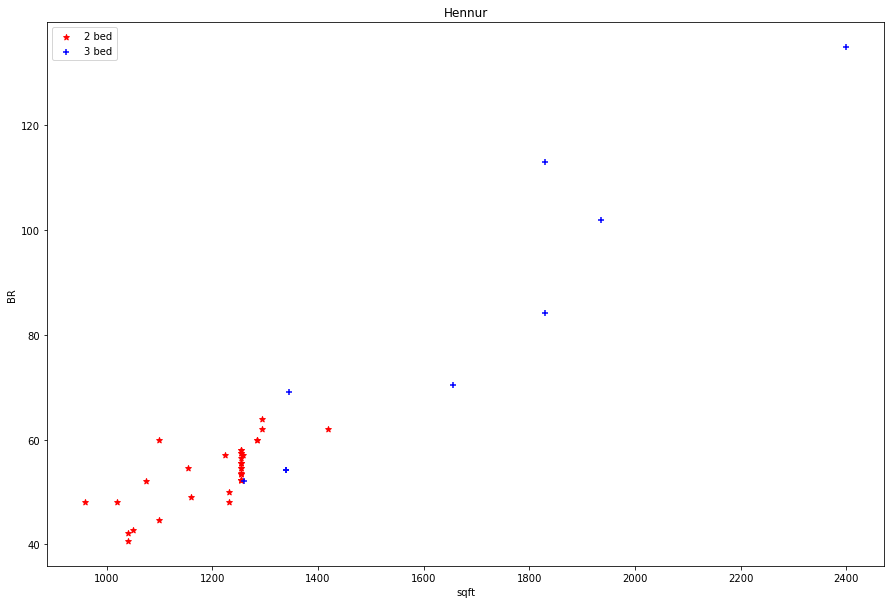

In [103]:
plt_sc(df3,'Hennur')    

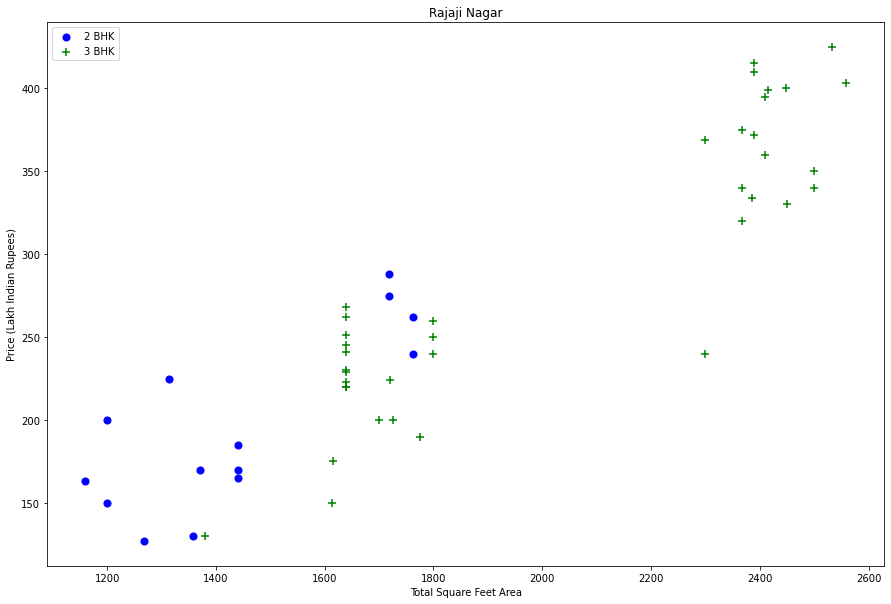

In [95]:
def plot_scatter_chart(df,location):
    bhk2 = df[(df.location==location) & (df.BR==2)]
    bhk3 = df[(df.location==location) & (df.BR==3)]
    import matplotlib.pyplot as plt
    %matplotlib inline
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.sqft,bhk2.price,color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3.sqft,bhk3.price,marker='+', color='green',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()
    
plot_scatter_chart(df3,"Rajaji Nagar")

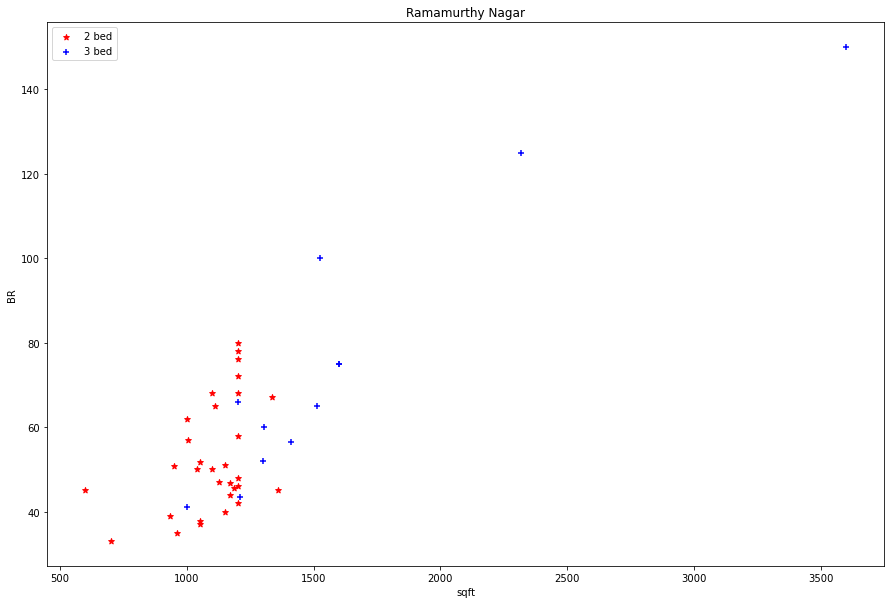

In [104]:
plt_sc(df3,'Ramamurthy Nagar')

In [108]:
def remove_out(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('BR'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('BR'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
df4 = remove_out(df3)
# df8 = df7.copy()
df4.shape

(7369, 6)

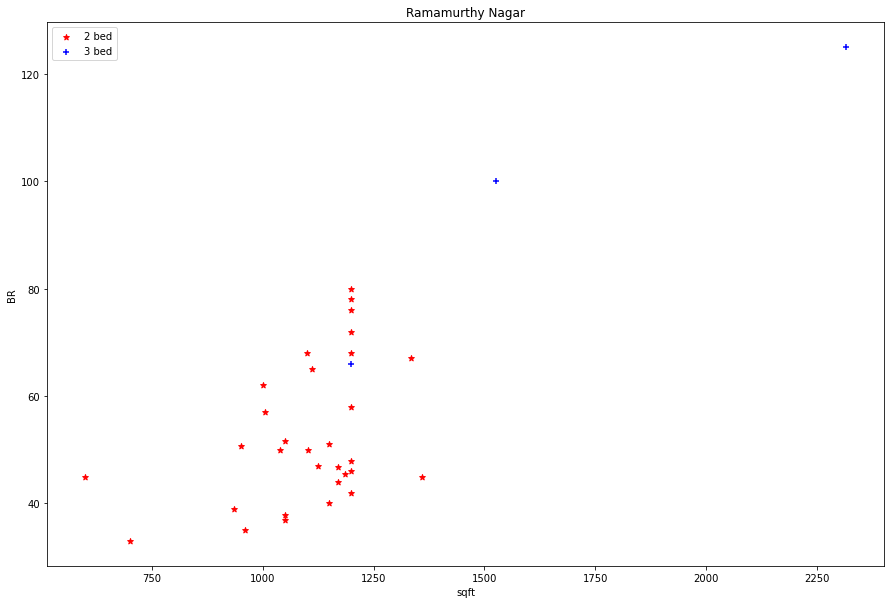

In [113]:
plt_sc(df4,'Ramamurthy Nagar')

Text(0, 0.5, 'Count')

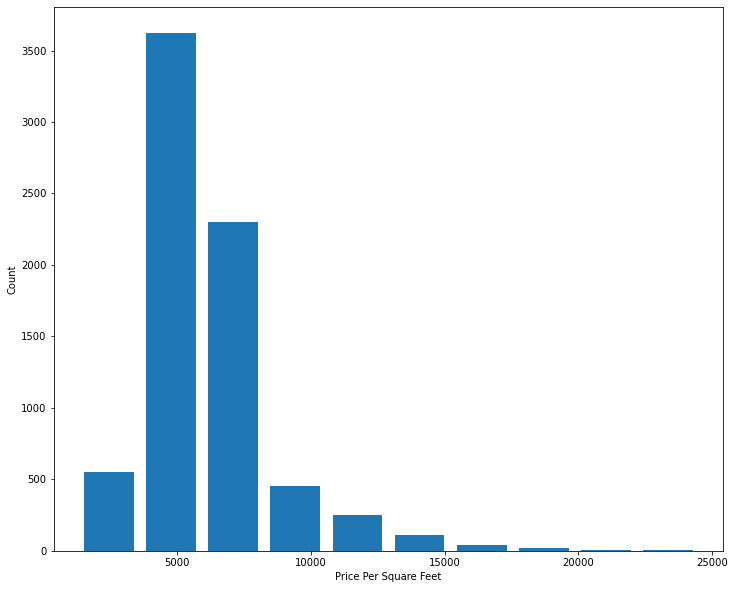

In [115]:
import matplotlib
matplotlib.rcParams["figure.figsize"] = (12,10)
plt.hist(df4.price_per_sqft,rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

In [116]:
df4.head()

,location,bath,price,BR,sqft,price_per_sqft
0,1st Block Jayanagar,4.0,428.0,4,2850.0,15017.543860
1,1st Block Jayanagar,3.0,194.0,3,1630.0,11901.840491
2,1st Block Jayanagar,2.0,235.0,3,1875.0,12533.333333
3,1st Block Jayanagar,2.0,130.0,3,1200.0,10833.333333
4,1st Block Jayanagar,2.0,148.0,2,1235.0,11983.805668


(array([4.794e+03, 1.769e+03, 6.830e+02, 8.100e+01, 2.900e+01, 7.000e+00,
        0.000e+00, 3.000e+00, 2.000e+00, 1.000e+00]),
 array([ 1. ,  2.5,  4. ,  5.5,  7. ,  8.5, 10. , 11.5, 13. , 14.5, 16. ]),
 <BarContainer object of 10 artists>)

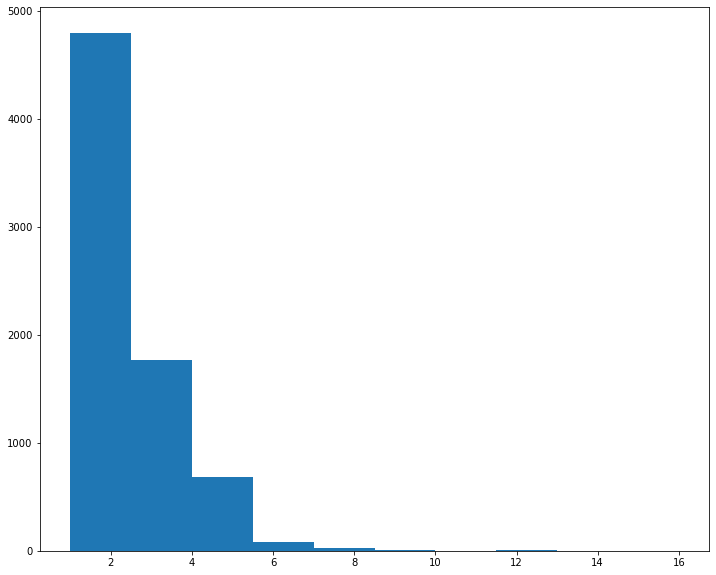

In [117]:
plt.hist(df4.bath)


In [120]:
df4[df4.bath>10]


,location,bath,price,BR,sqft,price_per_sqft
585,BTM 1st Stage,14.0,500.0,9,3300.0,15151.515152
5344,Neeladri Nagar,12.0,160.0,10,4000.0,4000.000000
8547,other,12.0,525.0,10,12000.0,4375.000000
8633,other,16.0,550.0,16,10000.0,5500.000000
9329,other,12.0,150.0,11,6000.0,2500.000000
9642,other,13.0,275.0,13,5425.0,5069.124424


In [124]:
df5= df4[df4.bath<df4.BR+2]

In [125]:
df5.shape

(7291, 6)

In [126]:
df4.shape

(7369, 6)

In [129]:
df5.drop('price_per_sqft',axis = 1,inplace=True)

C:\Users\Student\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [130]:
df5.sample(4)

,location,bath,price,BR,sqft
4876,Lingadheeranahalli,4.0,153.0,4,2236.0
3279,Horamavu Agara,2.0,47.0,2,1058.0
257,9th Phase JP Nagar,2.0,71.0,2,1466.0
6762,Thanisandra,1.0,27.5,1,580.0


In [133]:
d = pd.get_dummies(df5.location)
d

,1st Block Jayanagar,1st Block Koramangala,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10213,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10214,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10217,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10218,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [139]:
df6 = pd.concat([df5,d.drop('other',axis='columns')], axis =1)

In [140]:
df6.sample(3)

,location,bath,price,BR,sqft,1st Block Jayanagar,1st Block Koramangala,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
6550,Subramanyapura,3.0,72.00,3,1330.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
214,8th Phase JP Nagar,2.0,39.33,2,1035.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4982,Malleshwaram,3.0,275.00,3,2200.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [141]:
df6.drop('location',axis='columns',inplace=True)

In [143]:
df6.head(2)

,bath,price,BR,sqft,1st Block Jayanagar,1st Block Koramangala,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,4.0,428.0,4,2850.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3.0,194.0,3,1630.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [144]:
X = df6.drop('price',axis=1)

In [146]:
X.head(2)

,bath,BR,sqft,1st Block Jayanagar,1st Block Koramangala,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,4.0,4,2850.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3.0,3,1630.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [147]:
y = df6.price

In [149]:
from sklearn.model_selection import train_test_split

In [151]:
X_train,X_test,Y_train,Y_test = train_test_split(X,y,test_size=0.3,random_state=10)

In [152]:
from sklearn.linear_model import LinearRegression

In [153]:
model = LinearRegression()

In [155]:
model.fit(X_train,Y_train)

LinearRegression()

In [156]:
model.score(X_test,Y_test)

0.8524166110901483

In [161]:
from sklearn.linear_model import Lasso

In [162]:
from sklearn.model_selection import cross_val_score

In [191]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier

In [166]:
from sklearn.model_selection import ShuffleSplit

In [168]:
cv = ShuffleSplit(n_splits = 5,test_size=0.2,random_state=10)
cross_val_score(LinearRegression(),X,y,cv=cv)

array([0.85566723, 0.82469211, 0.83943771, 0.86036663, 0.79381194])

In [171]:
from sklearn.model_selection import GridSearchCV

In [222]:
def find_best(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'normalize': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best(X,y)


,model,best_score,best_params
0,linear_regression,0.853445,{'normalize': False}
1,lasso,0.703371,"{'alpha': 1, 'selection': 'random'}"
2,decision_tree,0.695081,"{'criterion': 'friedman_mse', 'splitter': 'best'}"
